## Bike Sharing Case Study

## Problem Statement

US Bike-sharing trying to understand the demand for shared bikes after the Covid-19 which has caused a considereable dip in their revenues. The aim of this study is to create a Business Plan which could acceralte the profit after Covid-19 Pandemic.

The Company requirement is as follows - 

- To identify the variables that are affecting the use boom bikes e.g. temp, humidity, windspeed, holiday etc. 

- Create a linear model that can quantitavely relates to the usage of boom bikes

- Find out the accuracy of the model

### Steps

These are the steps used to understand, analyse, predict and present the information : 

- Read the file, understand the data and visualize the data to see the behaviour (EDA, Exploraroty Data Analysis)
- Then the data will be split into trained and test data and train data will be rescalled 
- The Training data will be used to train Data
- Residual Analysis will conducted
- Predict and evaluate on the split test set
- Formulate the equation

### Libraries Used for the evalation

In [31]:
# Below are the required libraries for EDA and Multiple Linear Regression
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


#Supress warnings

import warnings
warnings.filterwarnings('ignore')

# this is to see more columns during analysis  
pd.options.display.max_columns = None
# this is to see more rows during analysis 
pd.options.display.max_rows = None



#### Step 1  : Reading and Understanding the Data

In [32]:
bikes = pd.read_csv("day.csv")

In [33]:
# Check the head of the dataset bikes dataframe
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [34]:
# Understand the shape of the data
bikes.shape

(730, 16)

In [35]:
# Understand the data type and if there is a missing values within the data
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


This shows that no values are missing from the dataset and most of the data is in numerical format. dteday is not in datetime format.

In [36]:
# Describe the dataframe to understand the data structure.

bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Provided data meaning is shown below
    - instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not 
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

From the above list we can see column instant does not hold any meaning to the outcome we are intending, also dteday column as other columns explain required information. Columns such as casual and registered is accumulated and shown in cnt column so this can be removed as well 

In [37]:
bikes = bikes.drop(['instant','dteday', 'casual', 'registered'] , axis =1)

 ### Step 2  : Visualize the Data

Next step is visualize the data to understand the basic behaviour within the data this will show :

- if there is any multicolinarity going on within the data 
- if there is a strong variables which can be seen

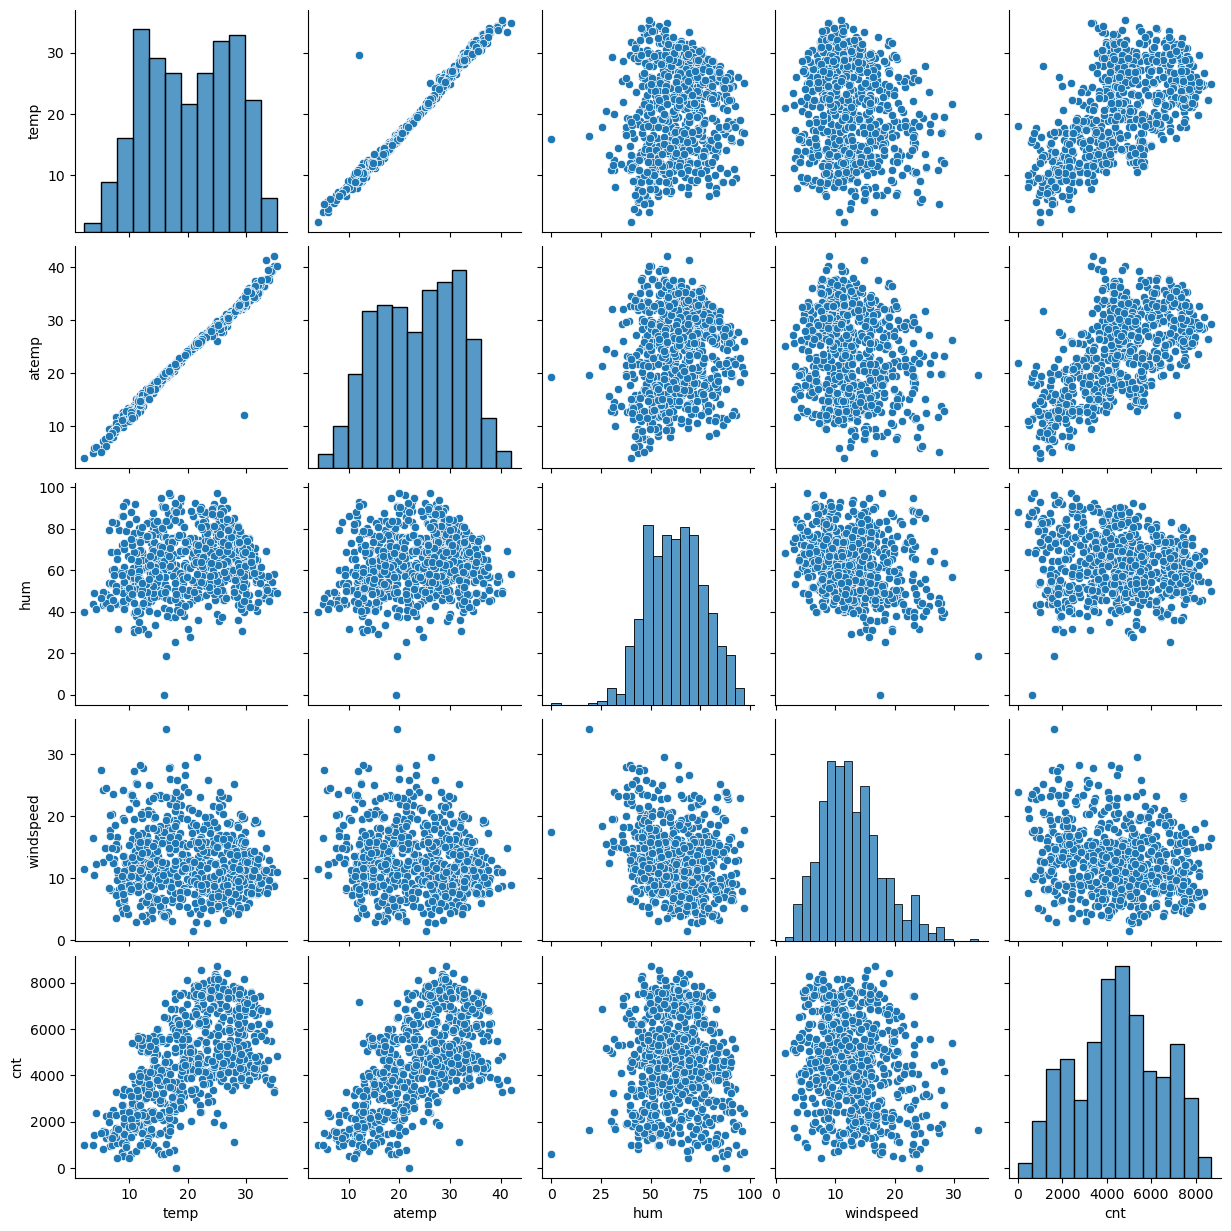

In [38]:
sns.pairplot(bikes[['temp','atemp','hum','windspeed','cnt' ]])
plt.show()

Pair plot shows a linear relation ship between temp and atemp as it is similar and related. It also shows relationship between temp,atemp and cnt. 

To understand the data bit more temp, atemp, windspeed and humidity and will be places into bins and plotted using line plot. These bins will be deleted before the next step

In [39]:
# For EDA purpose will be creating a bin and deleting it later on before model building
binstemp= [0, 10, 15, 20, 25,30,35, 40]
labelstemp = ['0-10','10-15','15-20','20-25','25-30','30-35','35-40']
bikes['tempbin']=pd.cut(bikes['temp'],bins =binstemp, labels=labelstemp)

In [40]:
# For EDA purpose will be creating a bin and deleting it later on before model building
binsatemp= [0, 10, 15, 20, 25,30,35, 40,45]
labelsatemp = ['0-10','10-15','15-20','20-25','25-30','30-35','35-40', '40-45']
bikes['atempbin']=pd.cut(bikes['temp'],bins =binsatemp, labels=labelsatemp)

In [41]:
# For EDA purpose will be creating a bin and deleting it later on before model building
binshum= [0, 20, 40, 60, 80,100]
labelshum = ['0-20','20-40','40-60','60-80','80-100']
bikes['humbin']=pd.cut(bikes['hum'],bins =binshum, labels=labelshum)

In [42]:
# For EDA purpose will be creating a bin and deleting it later on before model building
binswindspeed= [0, 10, 15, 20, 25,30,35, 40]
labelswindspeed = ['0-10','10-15','15-20','20-25','25-30','30-35','35-40']
bikes['windspeedbin']=pd.cut(bikes['windspeed'],bins =binswindspeed, labels=labelswindspeed)

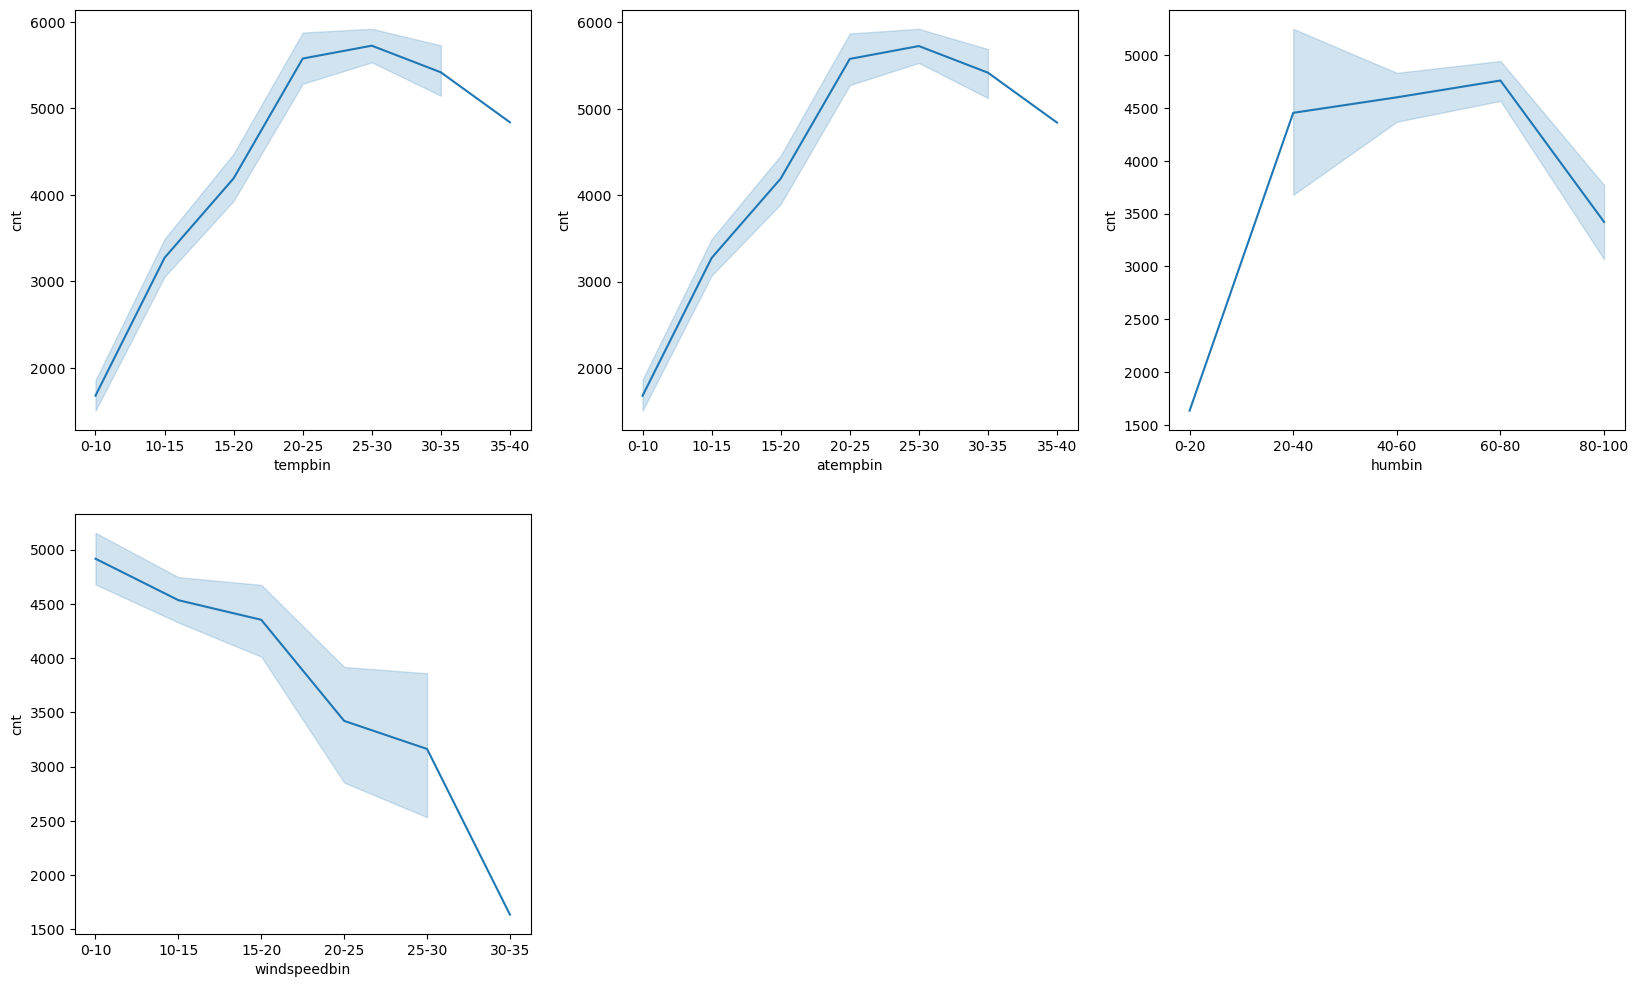

In [43]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.lineplot(x = 'tempbin', y = 'cnt', data = bikes)
plt.subplot(2,3,2)
sns.lineplot(x = 'atempbin', y = 'cnt', data = bikes)
plt.subplot(2,3,3)
sns.lineplot(x = 'humbin', y = 'cnt', data = bikes)
plt.subplot(2,3,4)
sns.lineplot(x = 'windspeedbin', y = 'cnt', data = bikes)


plt.show()

Above graph shows the general trend of the data temp and atemp clearly shows the trend while humidity as the humidity is higher the usability drops, as the windspeed increases usability shows. so there is a general trend among these data.

In [44]:
bikes.drop(['tempbin','atempbin','humbin','windspeedbin'],axis=1,inplace=True)

### Visualising Categorical Variables

Now the categorical vairable need to be assessed to answer whats the trend? what can be learnt from these ?. Box plots will be used to analyse these variables.

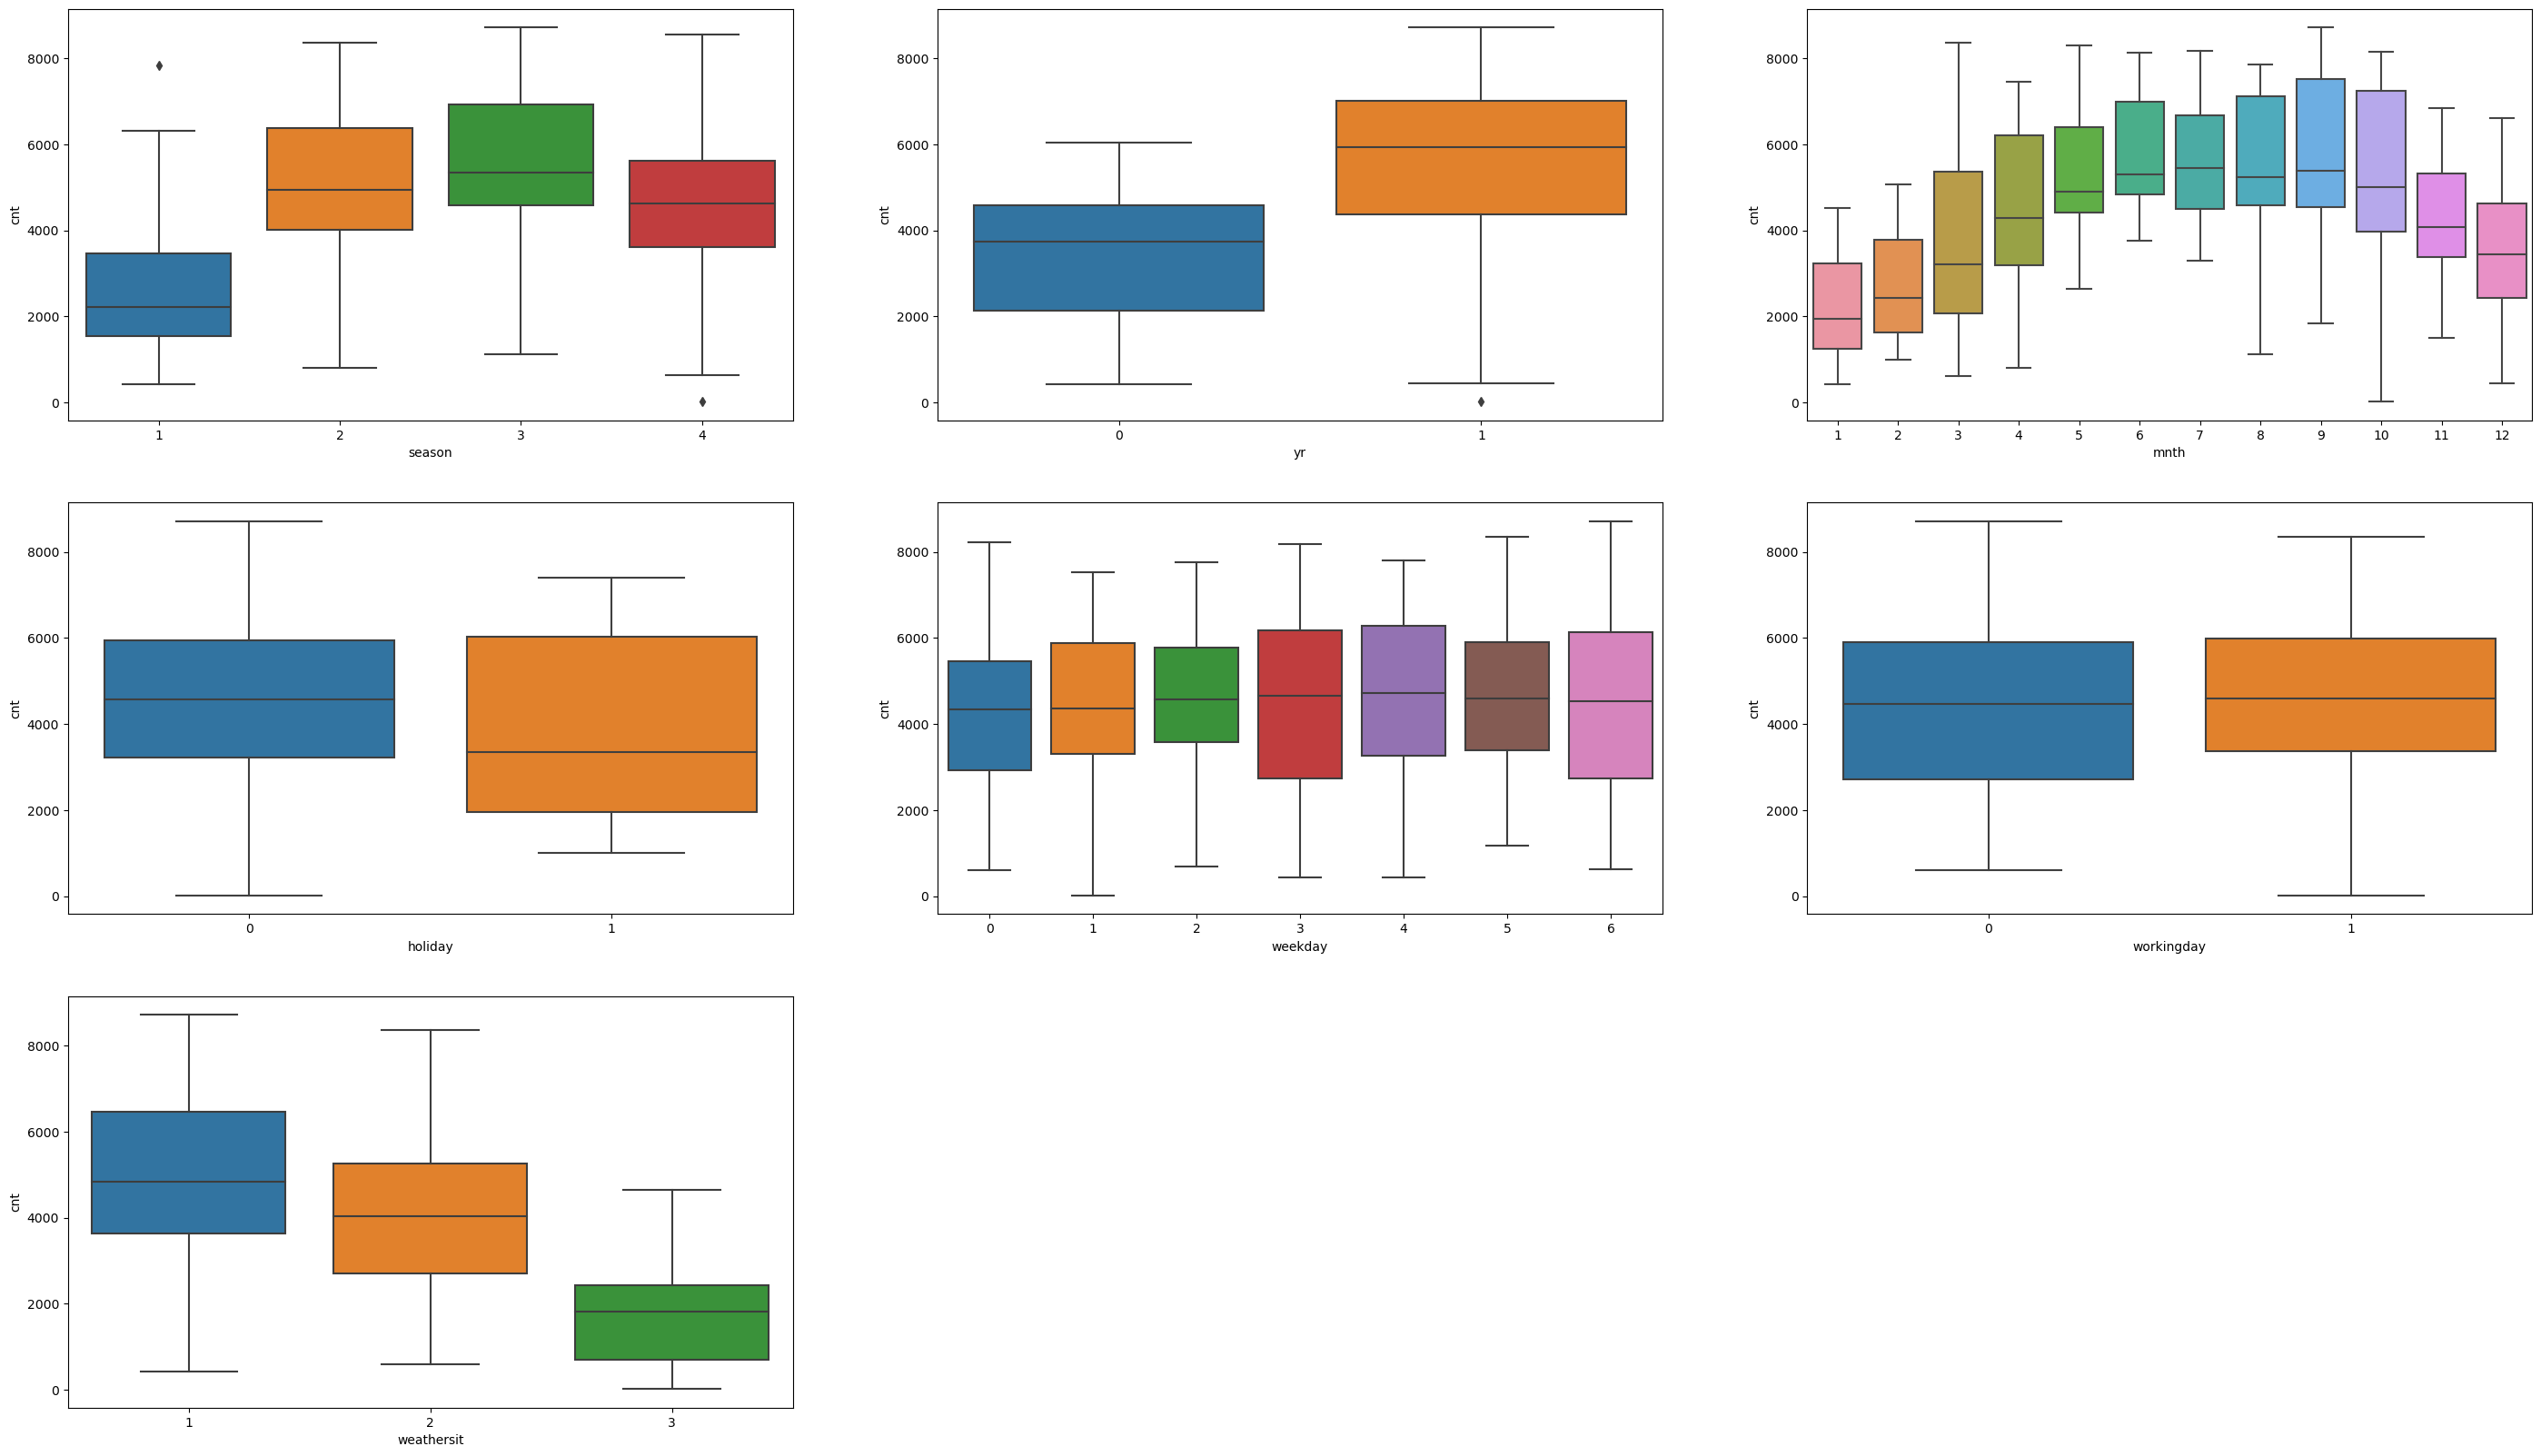

In [45]:
plt.figure(figsize=(35, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.show()

#### Visual Trend of the above box plots

season : season (1:spring, 2:summer, 3:fall, 4:winter)
- season vs cnt : Spring and winter has the low count of users, while summer and fall tend to be higher count of users

yr : year (0: 2018, 1:2019)
- year vs cnt : data shows 2019 there where more users than 2018, this could be due to the popularity increase with the product

mnth : month ( 1 to 12)

- mnth vs cnt : this is a reflection of season information.

- holiday vs cnt  : median on non holiday is higher than holiday, there is slight trend showing non holiday might be better trend

- weekday vs cnt  : this data suggest there median are higher on mon-fri

- workingday vs cnt : the median shows that working day may be have a slight effect on use

weathersit : 
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


- weathersit vs cnt : data shows when it is clear (1) climate usuability is high as the weather worsens the usability drops.

### Step 3 : Data Preparation

Variables such as season , weathersit, weekday and month are in integer format (does not mean anything to the model) which will need to converted to strings mentioned in the decription before converting back to integer format using dummy variables.

In [46]:

varlist = ['season']

# Defining the map function
def map(x):
    return x.map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})

# Applying the function to the housing list
bikes[varlist] = bikes[varlist].apply(map)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [47]:
varlist = ['weathersit']

# Defining the map function
def map(x):
    return x.map({1: "Clear", 2: "Mist", 3: "Light Snow", 4: "Snow + Fog"})

# Applying the function to the housing list
bikes[varlist] = bikes[varlist].apply(map)


In [48]:
varlist = ['mnth']

# Defining the map function
def map(x):
    return x.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',
                   10:'October',11:'November',12:'December'})

# Applying the function to the housing list
bikes[varlist] = bikes[varlist].apply(map)


In [49]:
varlist = ['weekday']

# Defining the map function
def map(x):
    return x.map({0:'Sunday', 1:'Monday', 2:'Tuesday',3:'Wednesday', 4: 'Thursday', 5:'Friday', 6:'Saturday'})

# Applying the function to the housing list
bikes[varlist] = bikes[varlist].apply(map)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


Year, Holiday and workingday is in 0 or 1 (yes or no) format so these variables can be left as it is

### Dummy Variables

In [50]:
season = pd.get_dummies(bikes['season'], drop_first=True)
bikes = pd.concat([bikes, season], axis = 1) 
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter
0,Spring,0,January,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,Spring,0,January,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,Spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


First column is dropped since once cariable can be predicted from the others. (to avoid dummy variable trap). Same will be applied to all the rest of the variables.

In [51]:
mnth = pd.get_dummies(bikes['mnth'], drop_first=True)
bikes = pd.concat([bikes, mnth], axis = 1) 

weekday = pd.get_dummies(bikes['weekday'], drop_first=True)
bikes = pd.concat([bikes, weekday], axis = 1)

weathersit = pd.get_dummies(bikes['weathersit'], drop_first=True)
bikes = pd.concat([bikes, weathersit], axis = 1)

bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
0,Spring,0,January,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,Spring,0,January,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,Spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Now the categorical variable columns need to be dropped since the dummy has been created for them, also atemp as well since it is heavely correlated with temp.

In [52]:
bikes.drop(['season','mnth','weekday','weathersit','atemp'], axis = 1, inplace = True)
bikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Step 4 : Splitting Data and Rescalling

The Data needs to be split into traning data and test data 

In [53]:
# Library is already called up at the top

bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescalling the Features

Now the variables such as temp, hum, windspeed and cnt needs to be scalled otherwise the model will very large or very small depending on the co-efficients

In [54]:
# MinMax Scaler library is called up in the top

scaler = MinMaxScaler()

num_vars = ['temp','hum', 'windspeed', 'cnt']

bikes_train[num_vars] = scaler.fit_transform(bikes_train[num_vars])


In [55]:
bikes_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [56]:
bikes_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


It can be observed that all max has gone to 1.00 shows data is prepared to trained.

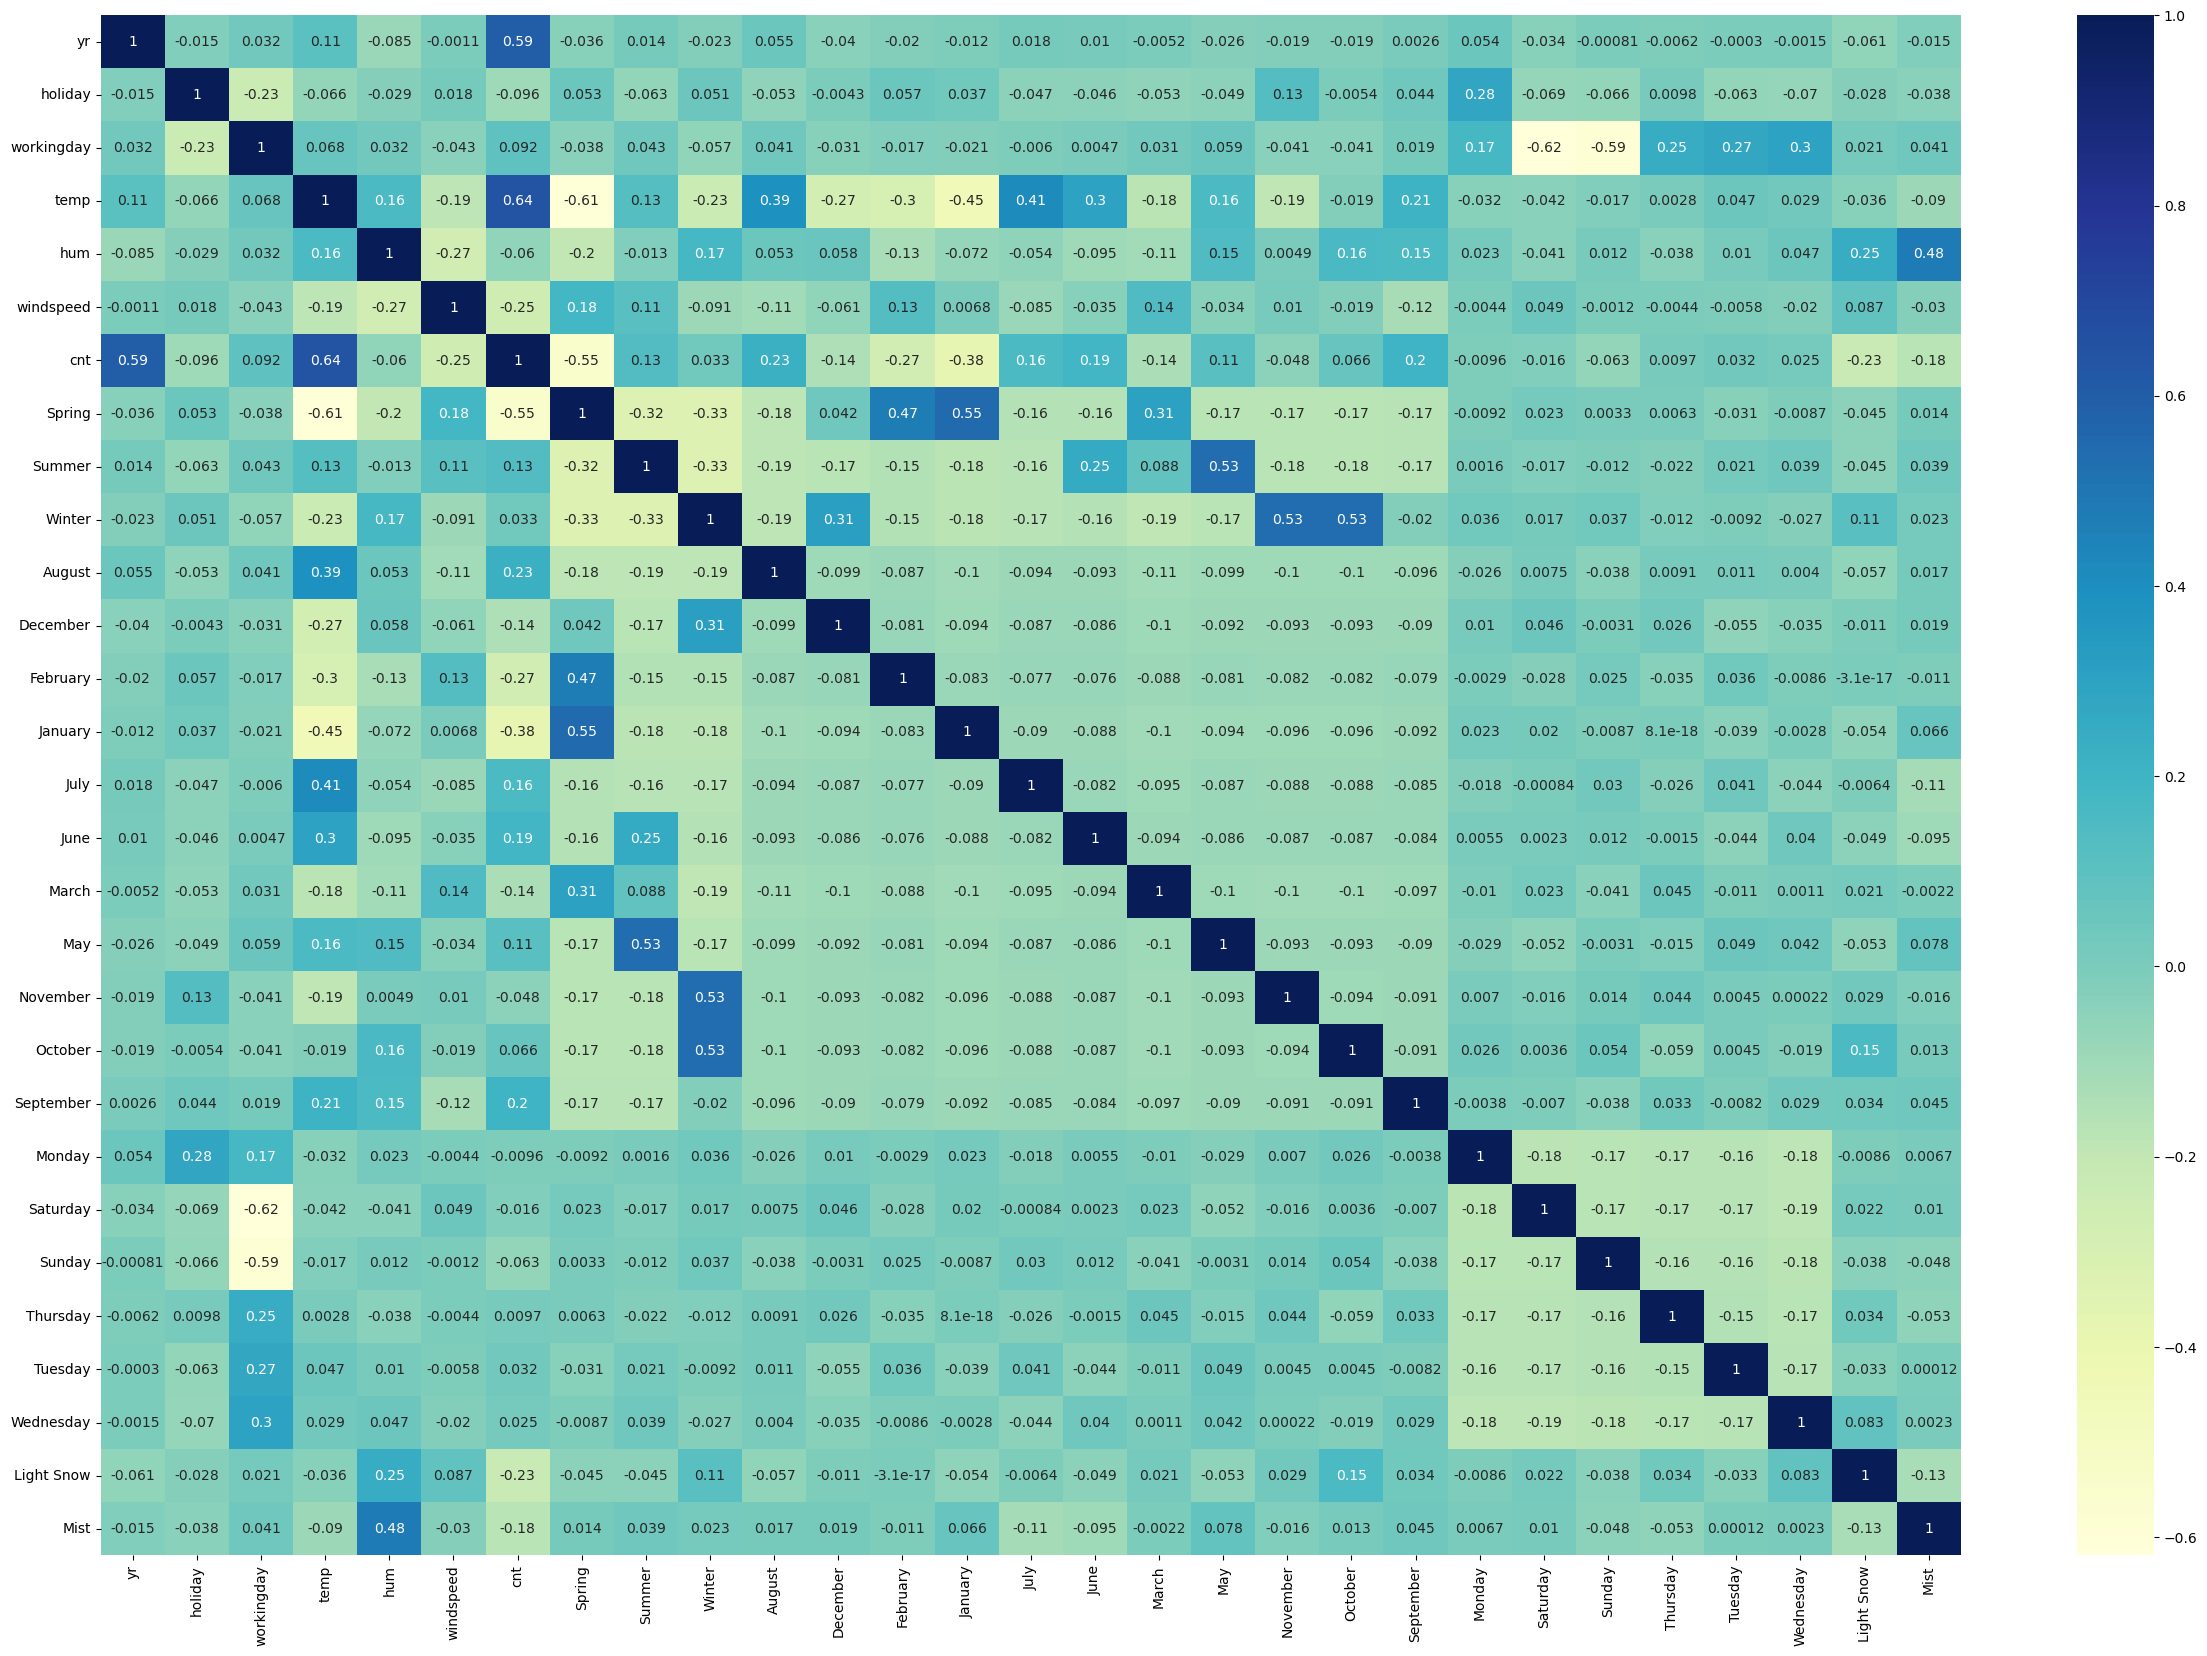

In [57]:
plt.figure(figsize = (30, 20))
sns.heatmap(bikes_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

From the Matrix we can see that cnt got good correlation with year, temp and atemp, also slight correlation with working day, summer, august, july, june and september. this agrees with the EDA.

### Step 5  : Training The Model

Training data needs to be divided into x and y train data

#### Dividing into X and Y sets 

In [58]:
y_train = bikes_train.pop('cnt')
X_train = bikes_train

Analysis will be done using RFE (automatic coarse tunning) initially and then later on with filtering using linear method (fine tuning) to get optimum model

#### RFE Model

In [102]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step  = 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [103]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 3),
 ('Winter', True, 1),
 ('August', True, 1),
 ('December', False, 3),
 ('February', False, 3),
 ('January', False, 2),
 ('July', True, 1),
 ('June', False, 3),
 ('March', False, 2),
 ('May', False, 3),
 ('November', False, 2),
 ('October', False, 3),
 ('September', False, 3),
 ('Monday', False, 3),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 2),
 ('Tuesday', False, 3),
 ('Wednesday', False, 3),
 ('Light Snow', True, 1),
 ('Mist', True, 1)]

In [104]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Winter', 'August', 'July', 'Saturday', 'Sunday', 'Light Snow', 'Mist'],
      dtype='object')

In [105]:
X_train.columns[~rfe.support_]

Index(['Summer', 'December', 'February', 'January', 'June', 'March', 'May',
       'November', 'October', 'September', 'Monday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

#### Stats Model Analysis

In [106]:
X_train_rfe = X_train[col]

In [107]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [108]:
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [109]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.9
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          6.13e-189
Time:                        02:33:50   Log-Likelihood:                 508.58
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2334      0.025      9.188      0.0

In [110]:
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

In [111]:
X_train_lm = sm.add_constant(X_train_new)

In [112]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [114]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.9
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          6.13e-189
Time:                        02:34:25   Log-Likelihood:                 508.58
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2251      0.040      5.612      0.0

In [116]:
X_train_new2 = X_train_new.drop(["Sunday"], axis = 1)

In [117]:
X_train_lm = sm.add_constant(X_train_new2)

In [118]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [119]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          3.15e-189
Time:                        02:34:49   Log-Likelihood:                 506.47
No. Observations:                 510   AIC:                            -986.9
Df Residuals:                     497   BIC:                            -931.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2724      0.033      8.312      0.0

In [120]:
X_train_new2.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Winter', 'August', 'July', 'Saturday', 'Light Snow', 'Mist'],
      dtype='object')

In [121]:
X_train_new2 = X_train_new2.drop(['const'], axis=1)

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.56
2,temp,17.73
1,workingday,4.63
4,windspeed,4.14
5,Spring,2.59
11,Mist,2.24
6,Winter,2.12
0,yr,2.06
9,Saturday,1.82
8,July,1.51


In [123]:
X_train_new3 = X_train_new2.drop(["hum"], axis = 1)

In [124]:
X_train_lm = sm.add_constant(X_train_new3)

In [125]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [126]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          2.41e-187
Time:                        02:35:05   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1932      0.026      7.540      0.0

In [127]:
X_train_lm = X_train_lm.drop(['const'], axis=1)

In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,7.21
1,workingday,4.47
3,windspeed,4.14
0,yr,2.06
4,Spring,1.82
8,Saturday,1.79
10,Mist,1.54
5,Winter,1.52
6,August,1.45
7,July,1.44


In [178]:
X_train_lm2 = X_train_lm.drop(["August",'Saturday','Winter','workingday'], axis = 1)

In [179]:
X_train_lm3 = sm.add_constant(X_train_lm2)

In [180]:
lm = sm.OLS(y_train,X_train_lm3).fit()

In [181]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     326.9
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          1.91e-182
Time:                        02:42:03   Log-Likelihood:                 475.93
No. Observations:                 510   AIC:                            -935.9
Df Residuals:                     502   BIC:                            -902.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3018      0.019     15.642      0.0

In [182]:
X_train_lm3 = X_train_lm3.drop(['const'], axis=1)

In [183]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.19
2,windspeed,3.76
0,yr,2.03
3,Spring,1.51
6,Mist,1.48
4,July,1.28
5,Light Snow,1.06
